In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

color = '#4e6c50'
rgb_color = tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))

In [2]:

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/0_professional/1_projects/statistics/11. Exploratory Data Analysis/data/'

Mounted at /content/drive


In [3]:
data = pd.read_csv(path+'marketing_campaign.csv', sep='\t')

print(data.shape)
data.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Univariate analysis

In [4]:
# Data types
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
data.Dt_Customer = pd.to_datetime(data.Dt_Customer)

In [132]:
# Duplicates
data.duplicated(subset=['ID']).sum()

0

In [6]:
# Missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

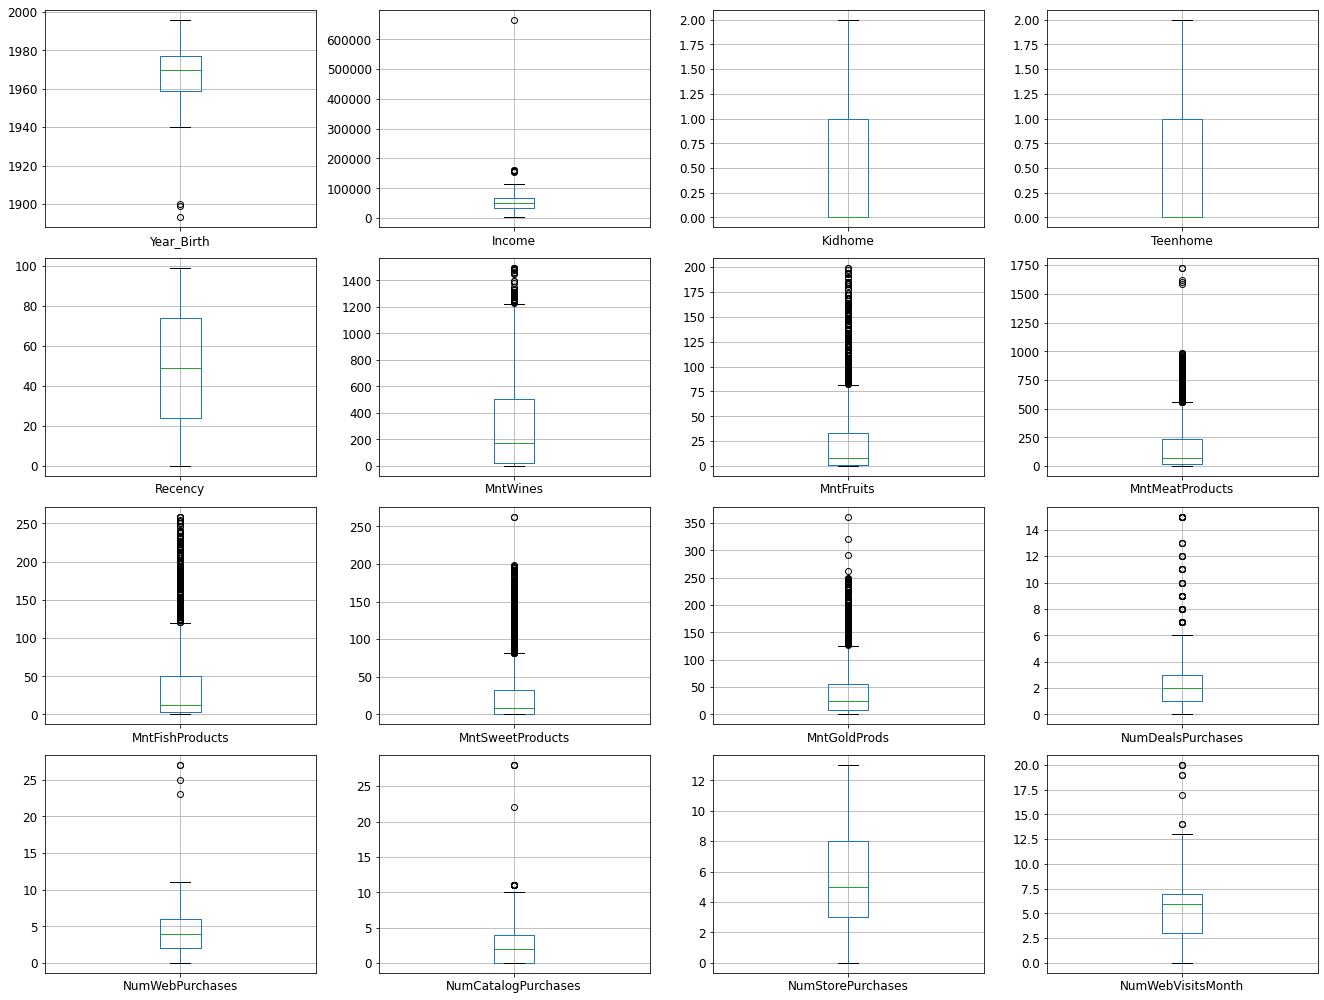

In [7]:
# Distributions
continuous_vars =  [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
    'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
    ]
fig, axes = plt.subplots(4,4) # create figure and axes

for i, el in enumerate(list(data[continuous_vars].columns.values)):
  a = data.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(18.5, 14)
plt.tight_layout() 

plt.show()

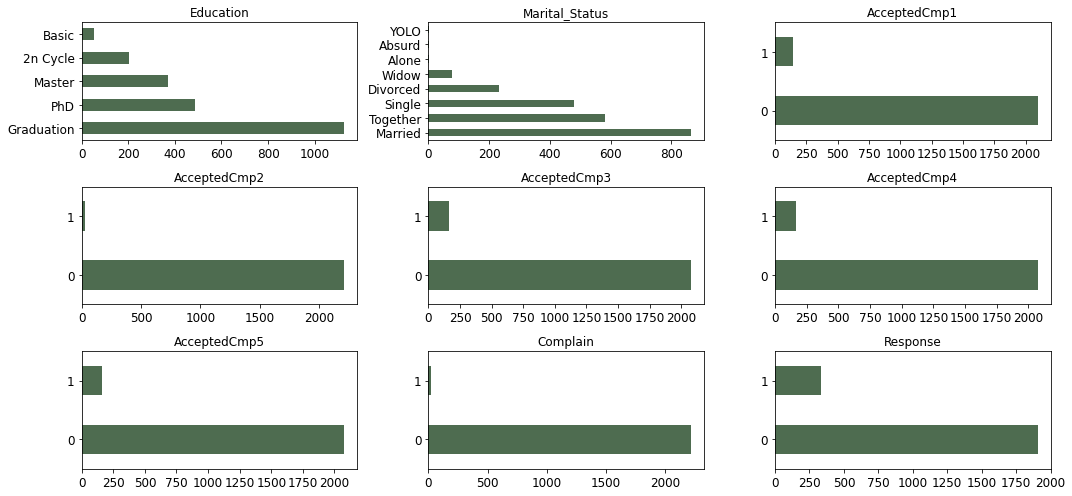

In [8]:
# Categories
categorical_vars =  [
    'Education', 'Marital_Status', 'AcceptedCmp1',
    'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5',  'Complain', 'Response'
    ]

fig, axes = plt.subplots(3,3) # create figure and axes

for i, el in enumerate(data[categorical_vars]):
  counts = data[el].value_counts()
  counts.plot(
      kind="barh",
      ax=axes.flatten()[i],
      fontsize='large',
      color=color
      ).set_title(el)      

fig.set_size_inches(15, 7)
plt.tight_layout() 
plt.show()

In [9]:
data[
    ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
     ].max(axis=1)==data['Response']

0       False
1        True
2        True
3        True
4        True
        ...  
2235     True
2236    False
2237    False
2238     True
2239    False
Length: 2240, dtype: bool

In [10]:
data.Complain.describe()

count    2240.000000
mean        0.009375
std         0.096391
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64

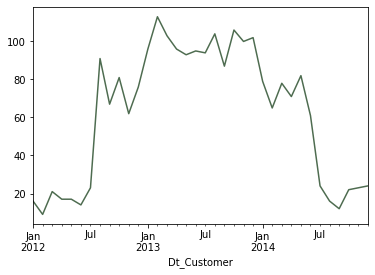

In [11]:
# Dates
data.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).count().ID.plot(x='index', color=color)

# Bivariate analysis

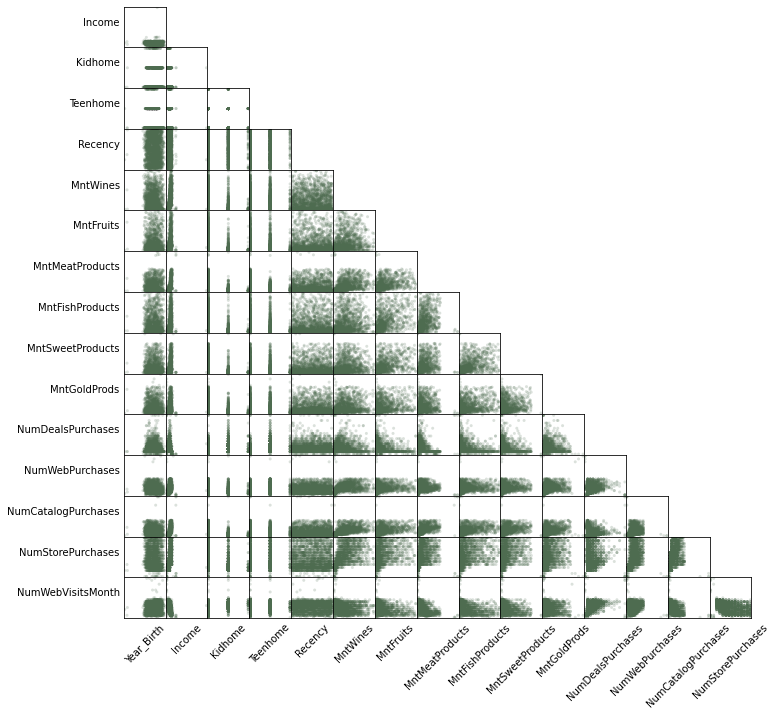

In [12]:
sm = pd.plotting.scatter_matrix(
    data[continuous_vars],
    color=color, figsize=(12, 12), alpha=0.2
    )

# hiding ticks
for subaxis in sm:
  for ax in subaxis:
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# hiding one half of the matrix + the diagonal
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)

pic = sm[0][0].get_figure()

In [13]:
# Getting rid of outliers
from scipy import stats

data_subset = data[continuous_vars].dropna()
data_subset = data_subset[(np.abs(stats.zscore(data_subset)) < 2).all(axis=1)]

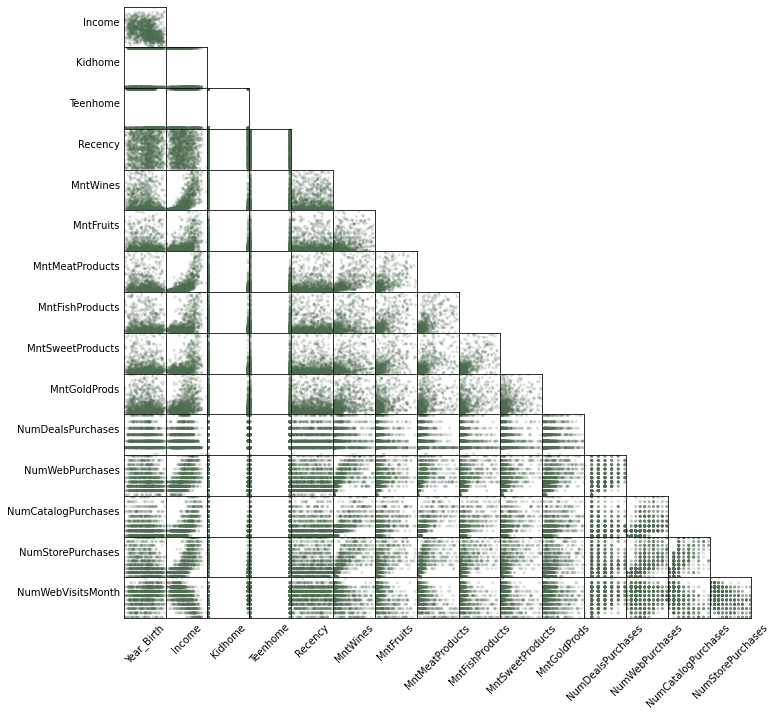

In [14]:
sm = pd.plotting.scatter_matrix(
    data_subset,
    color=color, figsize=(12, 12), alpha=0.2
    )

# hiding ticks
for subaxis in sm:
  for ax in subaxis:
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# hiding one half of the matrix + the diagonal
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)

pic = sm[0][0].get_figure()

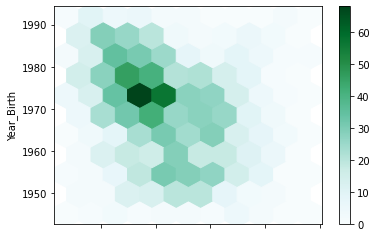

In [15]:
ax = data_subset.plot.hexbin(x='Income', y='Year_Birth', gridsize=10)

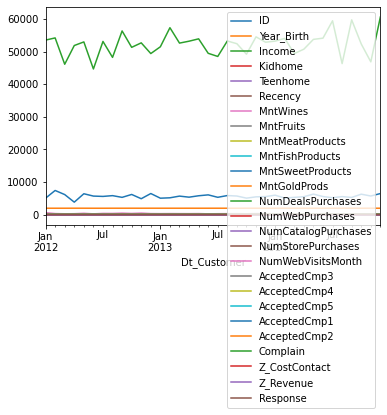

In [20]:
data_subset = data[continuous_vars]
data.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

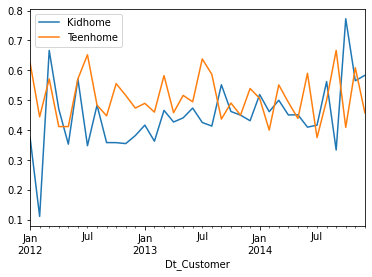

In [21]:
data_subset = data[['Dt_Customer','Kidhome','Teenhome']]
data_subset.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

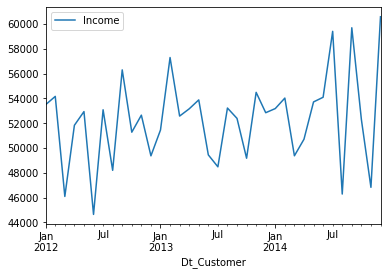

In [22]:
data_subset = data[['Dt_Customer','Income']]
data_subset.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

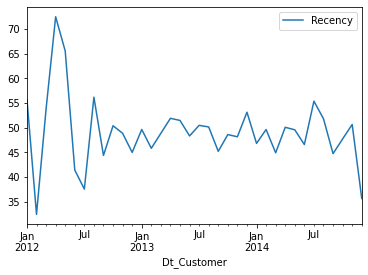

In [23]:
data_subset = data[['Dt_Customer','Recency']]
data_subset.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

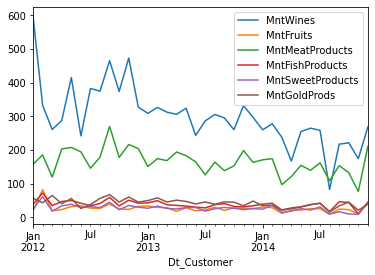

In [24]:
data_subset = data[['Dt_Customer','MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
data_subset.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

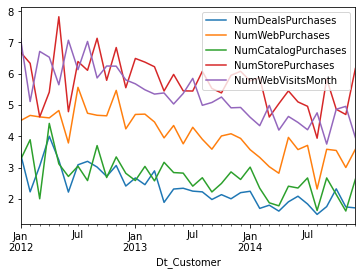

In [25]:
data_subset = data[['Dt_Customer','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth']]
data_subset.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

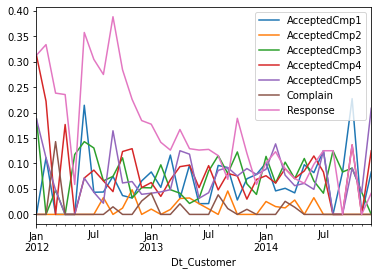

In [26]:
data_subset = data[['Dt_Customer', 'AcceptedCmp1',
    'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5',  'Complain', 'Response']]
data_subset.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

<ipython-input-27-6a32217d18b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['AcceptedAnyCmp'] = data[
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


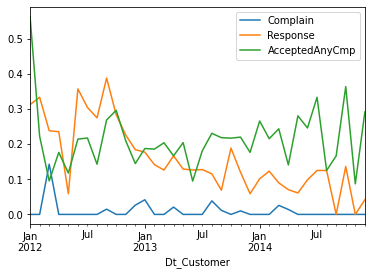

In [27]:
data_subset = data[['Dt_Customer', 'AcceptedCmp1',
    'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5',  'Complain', 'Response']]
data_subset['AcceptedAnyCmp'] = data[
    ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
     ].max(axis=1)
data_subset.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], axis=1, inplace=True)
data_subset.groupby(
    pd.Grouper(key='Dt_Customer', freq='M')
    ).mean().plot()

In [28]:
pd.crosstab(
    index=data['Marital_Status'], columns=data['Education'],
    normalize='columns'
    ).round(2)

Education,2n Cycle,Basic,Graduation,Master,PhD
Marital_Status,,,,,
Absurd,0.00,0.00,0.00,0.00,0.00
Alone,0.00,0.00,0.00,0.00,0.00
Divorced,0.11,0.02,0.11,0.10,0.11
Married,0.40,0.37,0.38,0.37,0.40
Single,0.18,0.33,0.22,0.20,0.20
Together,0.28,0.26,0.25,0.29,0.24
Widow,0.02,0.02,0.03,0.03,0.05
YOLO,0.00,0.00,0.00,0.00,0.00


In [29]:
pd.crosstab(
    index=data['Marital_Status'], columns=data['Response'],
    normalize='columns'
    ).round(2)

Response,0,1
Marital_Status,,
Absurd,0.00,0.00
Alone,0.00,0.00
Divorced,0.10,0.14
Married,0.40,0.29
Single,0.20,0.32
Together,0.27,0.18
Widow,0.03,0.06
YOLO,0.00,0.00


In [30]:
pd.crosstab(
    index=data['Education'], columns=data['Response'],
    normalize='columns'
    ).round(2)

Response,0,1
Education,,
2n Cycle,0.09,0.07
Basic,0.03,0.01
Graduation,0.51,0.46
Master,0.16,0.17
PhD,0.20,0.30


# Multivariate analysis

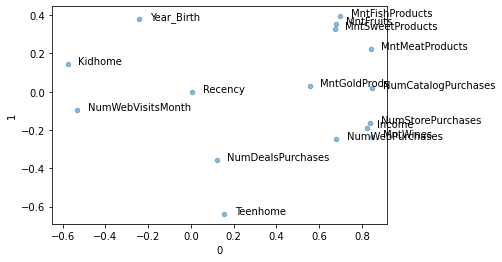

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

data_subset = data[continuous_vars].dropna()
data_subset = data_subset[(np.abs(stats.zscore(data_subset)) < 2).all(axis=1)]

# Scaling data
X = data_subset[continuous_vars].dropna().to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a FactorAnalysis object and fit it to our data
fa = FactorAnalysis(n_components=2)
fa.fit(X_scaled)

# DataFrame for visualization
fa_components = pd.DataFrame(fa.components_.T)
fa_components.index=continuous_vars

# Scatter plot
ax = fa_components.plot.scatter(x=0, y=1, alpha=0.5)

# Annotate each data point
for i, txt in enumerate(fa_components.index):
   ax.annotate(txt, (fa_components[0].iat[i]+0.05, fa_components[1].iat[i]))

plt.show()

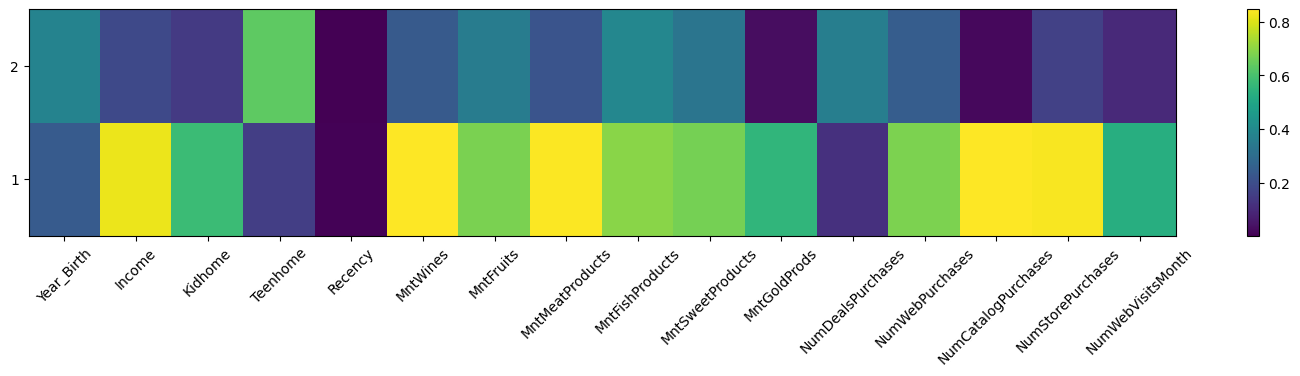

In [95]:
# Another possible plot
Z=np.abs(fa.components_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)

fig.set_size_inches(18.5, 3)
fig.set_dpi(100)

ax.set_yticks(np.arange(fa.components_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.components_.shape[1])+0.5, minor=False)
ax.set_yticklabels(np.arange(fa.components_.shape[0])+1)
ax.set_xticklabels(list(data[continuous_vars]), rotation = 45)
plt.show()

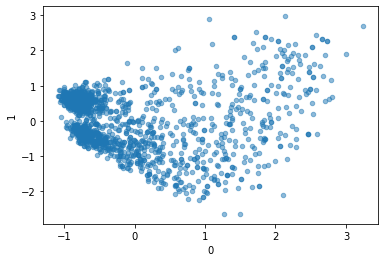

In [103]:
# DataFrame for visualization
fa_transformed = pd.DataFrame(fa.transform(X_scaled))

# Scatter plot
ax = fa_transformed.plot.scatter(x=0, y=1, alpha=0.5)

plt.show()

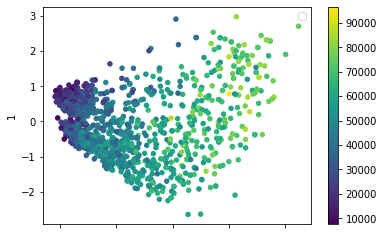

In [107]:
# DataFrame for visualization
fa_transformed = pd.DataFrame(fa.transform(X_scaled))

# Scatter plot
ax = fa_transformed.plot.scatter(
    x=0, y=1, c=data_subset['Income'],
    colormap='viridis'
    )

plt.legend()
plt.show()

## Regression analysis

In [121]:
# Import the necessary libraries
import statsmodels.api as sm

# Preparing data
data_subset = data_subset.dropna()
X = data_subset.drop('Income', axis=1)
y = data_subset['Income']

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              3115.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:47:20   Log-Likelihood:                         -14825.
No. Observations:                1425   AIC:                                  2.968e+04
Df Residuals:                    1410   BIC:                                  2.976e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year_Birth             20.6642      0.636     32.476      0.000      19.416      21.912
Kidhome              4647.6093    581.510      7.992      0.000    3506.892    5788.327
Teenhome             1.051e+04    514.866     20.421      0.000    9503.896    1.15e+04
Recency                -6.8188      7.387     -0.923      0.356     -21.310       7.672
MntWines               18.1629      1.981      9.169      0.000      14.277      22.049
MntFruits               3.5283     16.761      0.211      0.833     -29.351      36.408
MntMeatProducts        38.5476      3.460     11.142      0.000      31.761      45.334
MntFishProducts         4.6565     11.977      0.389      0.698     -18.839      28.152
MntSweetProducts       -1.1491     15.858     -0.072      0.942     -32.256      29.958
MntGoldProds           -1.5890      8.945     -0.178      0.859     -19.137      15.959
NumDealsPurchases   -2571.0489    210.204    -12.231      0.000   -2983.395   -2158.703
NumWebPurchases      2175.5065    162.771     13.365      0.000    1856.207    2494.806
NumCatalogPurchases  -121.5183    228.489     -0.532      0.595    -569.733     326.697
NumStorePurchases     631.2388    153.771      4.105      0.000     329.594     932.883
NumWebVisitsMonth   -2628.2601    152.014    -17.290      0.000   -2926.458   -2330.062
==============================================================================
Omnibus:                        3.808   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.733
Skew:                          -0.124   Prob(JB):                        0.155
Kurtosis:                       3.039   Cond. No.                     5.84e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
# Import the necessary libraries
import statsmodels.api as sm

# Preparing data
data_subset = data_subset.dropna()
X = data_subset.drop(['Income', 'Recency', 'MntFruits', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumCatalogPurchases'], axis=1)
y = data_subset['Income']

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              5209.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:52:15   Log-Likelihood:                         -14826.
No. Observations:                1425   AIC:                                  2.967e+04
Df Residuals:                    1416   BIC:                                  2.972e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year_Birth           20.4264      0.583     35.049      0.000      19.283      21.570
Kidhome            4671.0940    573.104      8.151      0.000    3546.870    5795.318
Teenhome            1.05e+04    507.193     20.707      0.000    9507.640    1.15e+04
MntWines             17.5821      1.776      9.902      0.000      14.099      21.065
MntMeatProducts      38.5493      2.944     13.094      0.000      32.774      44.324
NumDealsPurchases -2601.5116    205.797    -12.641      0.000   -3005.212   -2197.812
NumWebPurchases    2182.2323    155.101     14.070      0.000    1877.981    2486.484
NumStorePurchases   648.4868    149.082      4.350      0.000     356.042     940.932
NumWebVisitsMonth -2613.6197    145.127    -18.009      0.000   -2898.306   -2328.933
==============================================================================
Omnibus:                        3.850   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.804
Skew:                          -0.126   Prob(JB):                        0.149
Kurtosis:                       3.018   Cond. No.                     5.74e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
results.predict(X)

1       40719.714008
2       63410.436155
3       32235.213602
4       41452.822649
5       62295.433398
            ...     
2231    62060.138281
2232    29775.589489
2234    27897.837649
2238    72765.762703
2239    41956.106291
Length: 1425, dtype: float64

In [128]:
y

1       46344.0
2       71613.0
3       26646.0
4       58293.0
5       62513.0
         ...   
2231    44802.0
2232    26816.0
2234    34421.0
2238    69245.0
2239    52869.0
Name: Income, Length: 1425, dtype: float64